### ***Importing necessary libraries***

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ***Load train_data***

In [16]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')

### ***Exploratory Data Analysis (EDA)***

In [17]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train_data.shape

(614, 13)

In [19]:
# Display basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
# Summary statistics of numerical columns
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


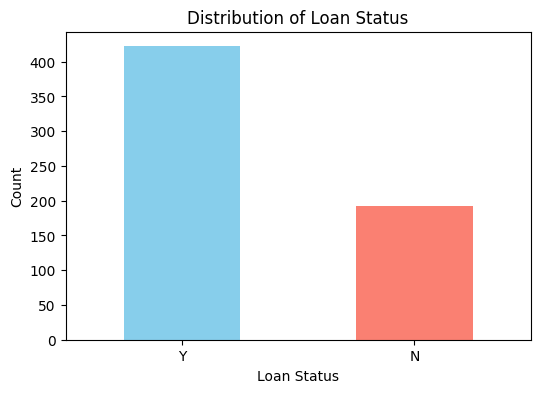

In [21]:
# Distribution of Loan_Status
plt.figure(figsize=(6, 4))
train_data['Loan_Status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Loan Status by Gender')

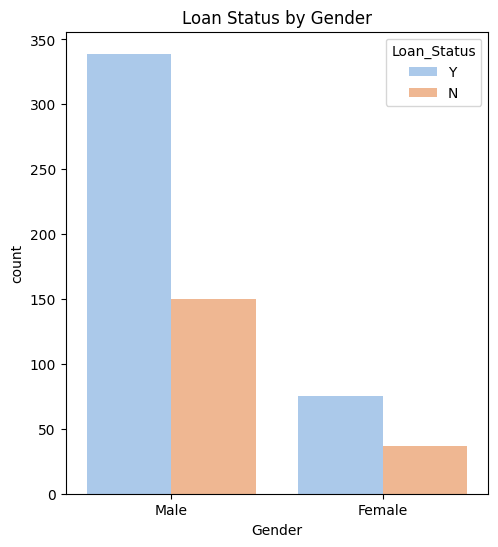

In [22]:
# Relationship between Gender and Loan_Status
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=train_data, palette='pastel')
plt.title('Loan Status by Gender')

<Axes: xlabel='Married', ylabel='Loan_Status'>

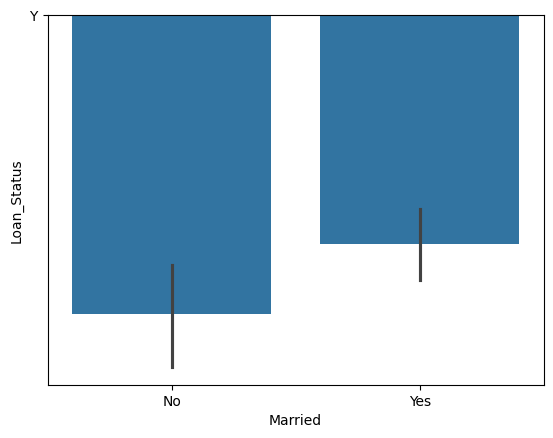

In [23]:
# Barplot of Married by Loan_Status
sns.barplot(data = train_data, x='Married', y='Loan_Status')

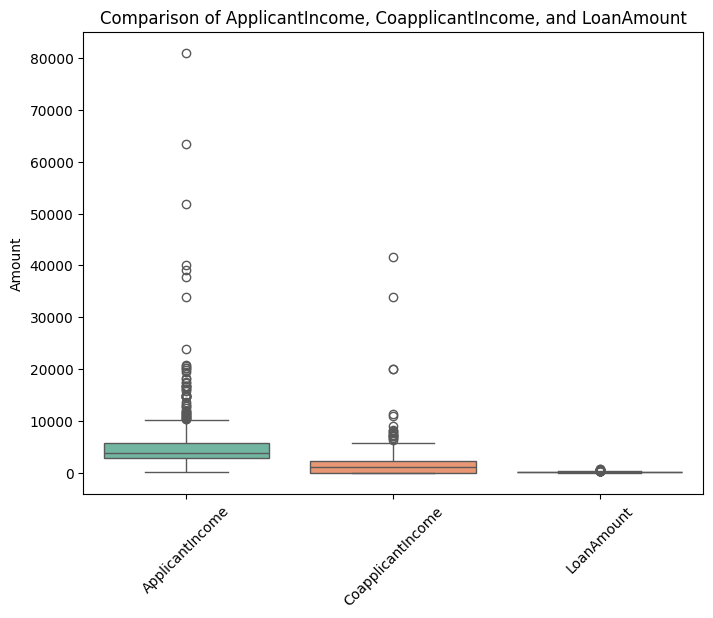

In [24]:
# Box plot of Applicant income by Coapplicant income with Loan amount
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']], palette='Set2')
plt.title('Comparison of ApplicantIncome, CoapplicantIncome, and LoanAmount')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


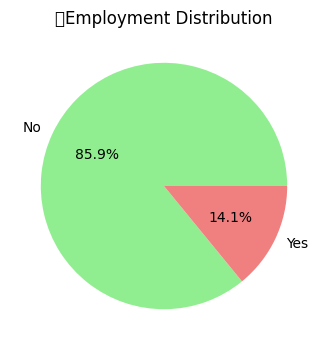

In [25]:
# Pie chart for Self_Employed
plt.figure(figsize=(6, 4))
train_data['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('	Employment Distribution')
plt.ylabel('')
plt.show()


<ipython-input-26-7211116893c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Loan_Status', y='LoanAmount', data=train_data, palette='muted')


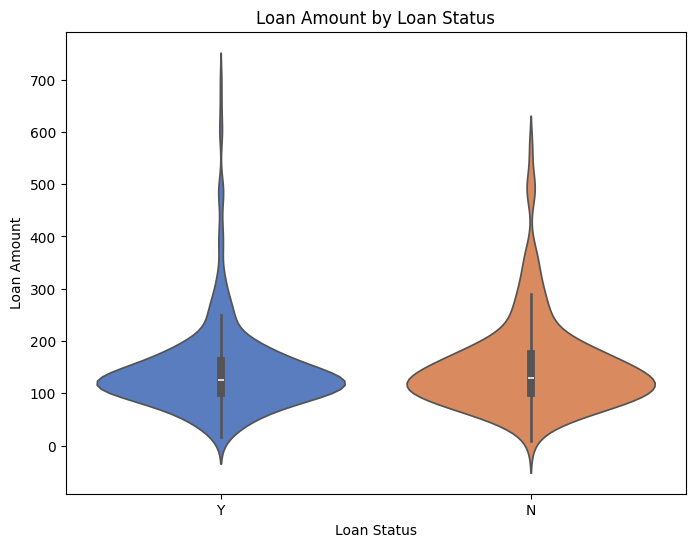

In [26]:
# Violin plot for Loan Amount by Loan Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='Loan_Status', y='LoanAmount', data=train_data, palette='muted')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

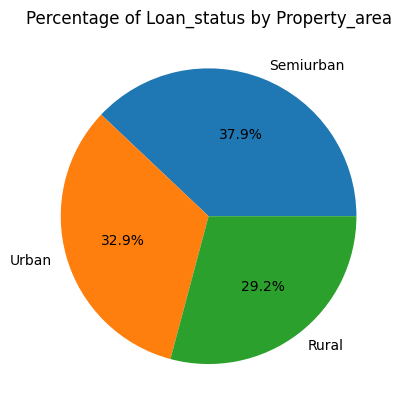

In [27]:
# Pie chart of Loan_status by Property_area
property_counts = train_data['Property_Area'].value_counts()

#calculate the percentages
property_percentages = property_counts/len(train_data* 100)

# create the pie chart
plt.pie(property_percentages, labels=property_counts .index, autopct='%1.1f%%')
plt.title('Percentage of Loan_status by Property_area')
plt.show()

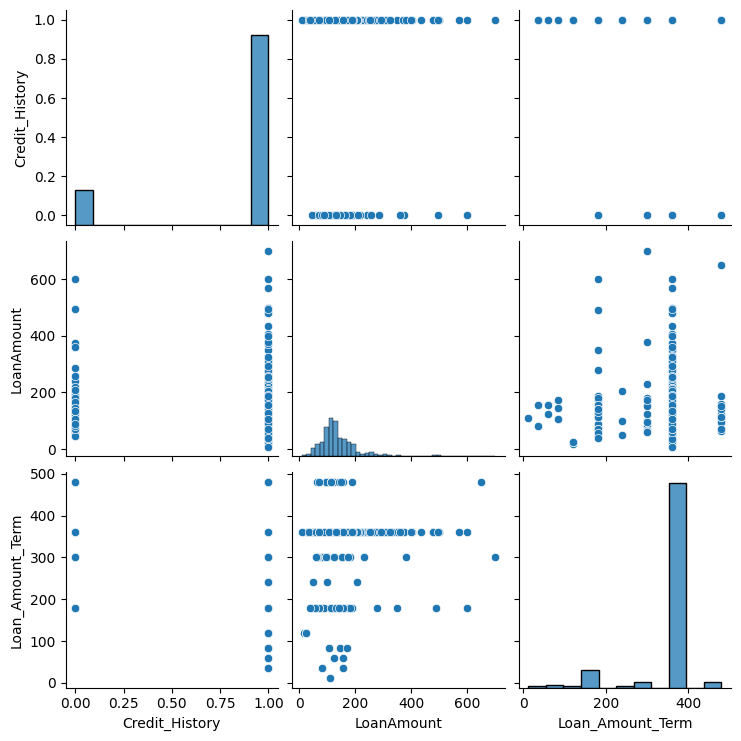

In [28]:
# Pairwise correlation plot
sns.pairplot(train_data[['Credit_History', 'LoanAmount', 'Loan_Amount_Term']])

## ***Pre-processing on train_data***

In [29]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### ***Pre-processing- Handling missing values***

In [30]:
# Checking for missing values
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

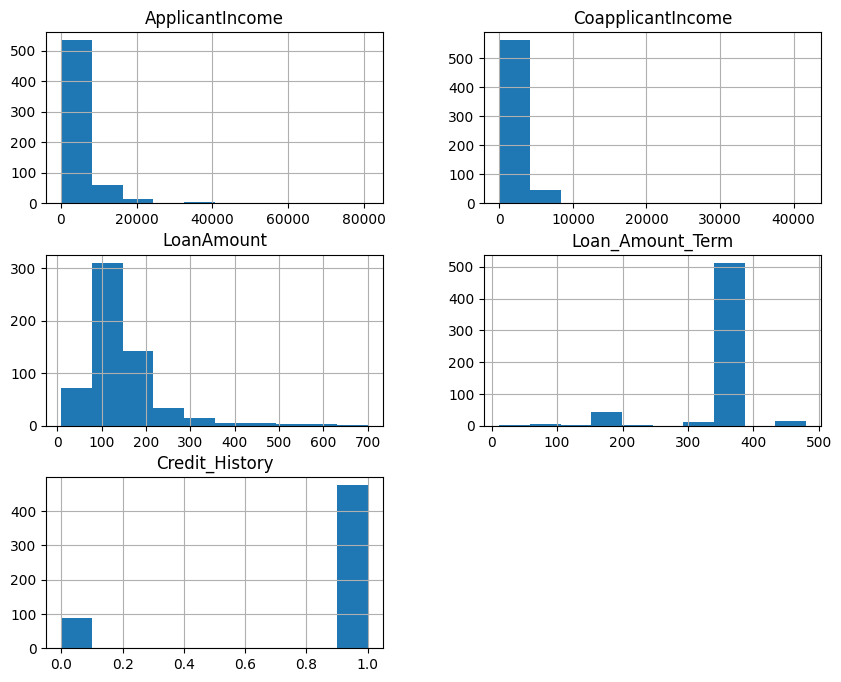

In [31]:
graph = train_data.select_dtypes(include=['float64','int64'])
graph.hist(figsize=(10,8))
plt.show()

In [32]:
# Handling missing values

# Filling missing values for 'LoanAmount' and 'Loan_Amount_Term' using median (slightly skewed)
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())

In [33]:
# considering 'Credit_History' is a binary variable (0 or 1),
# we can impute missing values with the mode (most frequent value),
# which is 1 in this case, assuming a majority of applicants have a credit history.

train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

In [34]:
# Fill missing values in categorical columns with mode

categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for i in categorical_cols:
    train_data[i].fillna(train_data[i].mode()[0], inplace=True)

In [35]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### ***Pre-processing - Handling Outliers***

In [36]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

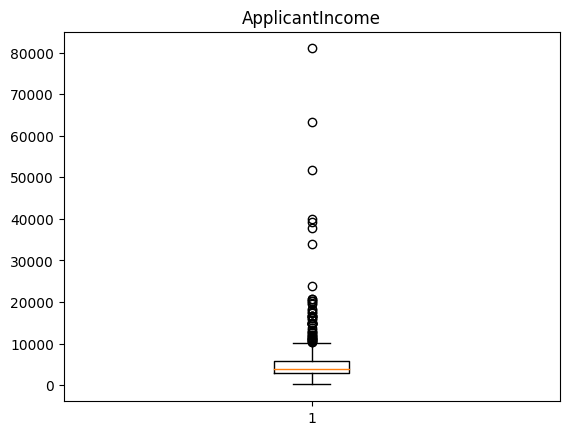

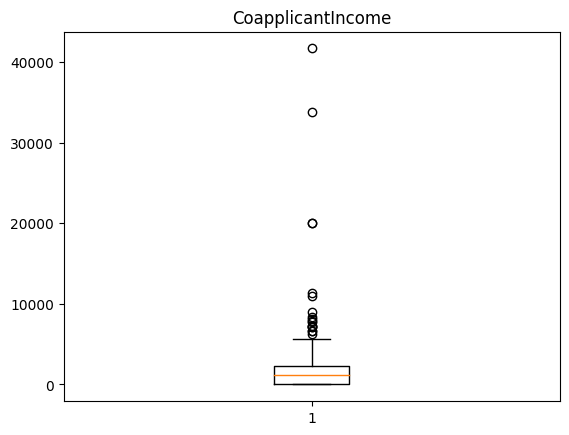

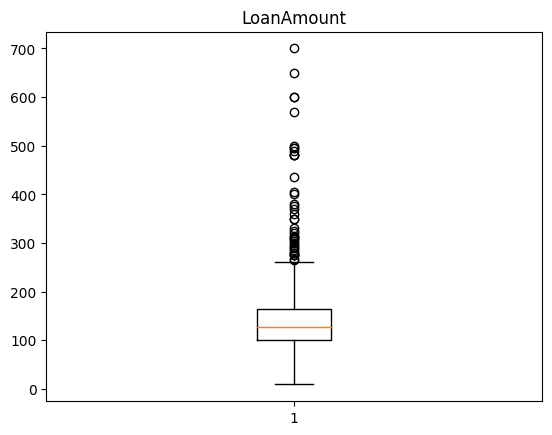

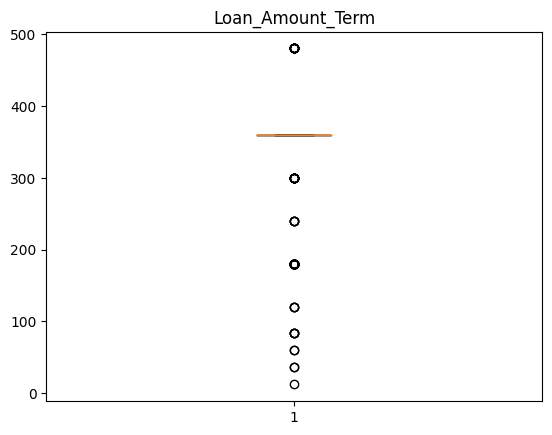

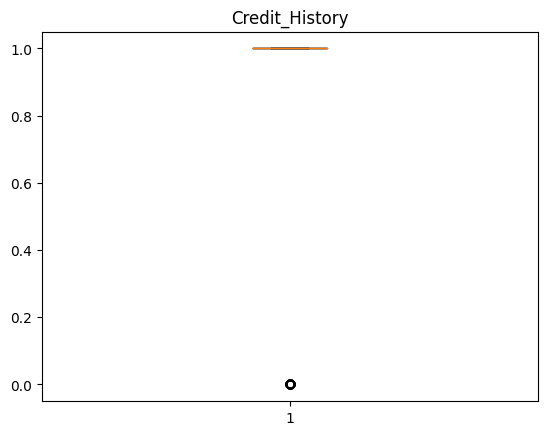

In [37]:
num_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_col:
  plt.boxplot(train_data[i])
  plt.title(i)
  plt.show()

In [38]:
# Handling outliers using IQR method

columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

def handle_outliers(train_data, columns):
  for x in columns:
    Q1 = train_data[x].quantile(0.25)
    Q3 = train_data[x].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    # clipping
    train_data[x] = train_data[x].clip(lower=lower_lim, upper=upper_lim)
    outliers = train_data[(train_data[x] < lower_lim) | (train_data[x] > upper_lim)]

  return train_data


train_data = handle_outliers(train_data,columns)

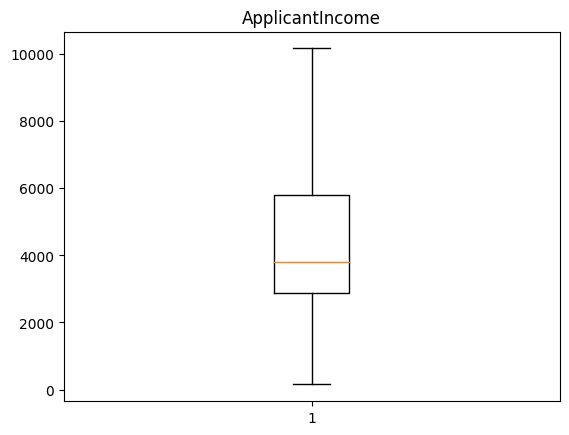

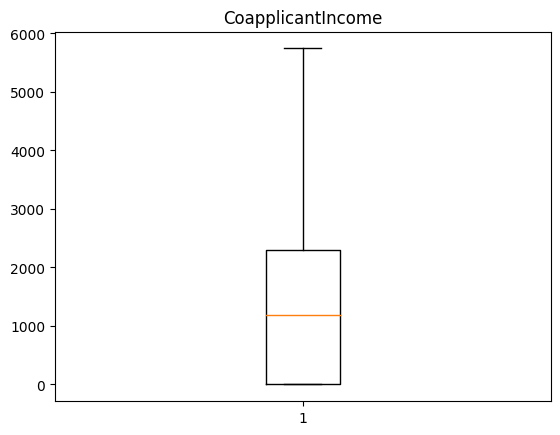

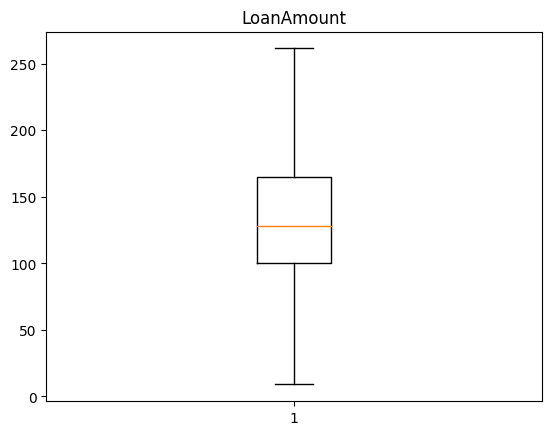

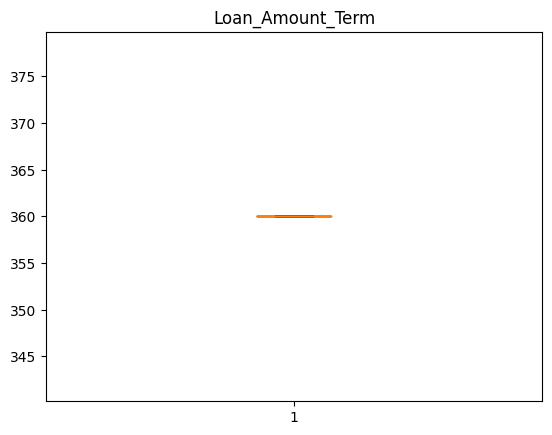

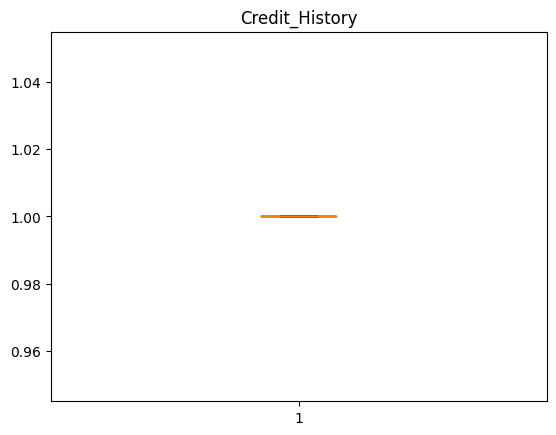

In [39]:
for i in num_col:
  plt.boxplot(train_data[i])
  plt.title(i)
  plt.show()

### ***Pre-processing - Encoding***

In [40]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder

# Assuming cat_columns contains the names of all categorical columns in your dataset
cat_columns = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area','Loan_Status']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for i in cat_columns:
    train_data[i] = label_encoder.fit_transform(train_data[i])

In [42]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


### ***Correlation - train_data***

<ipython-input-43-916fd456a1e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")


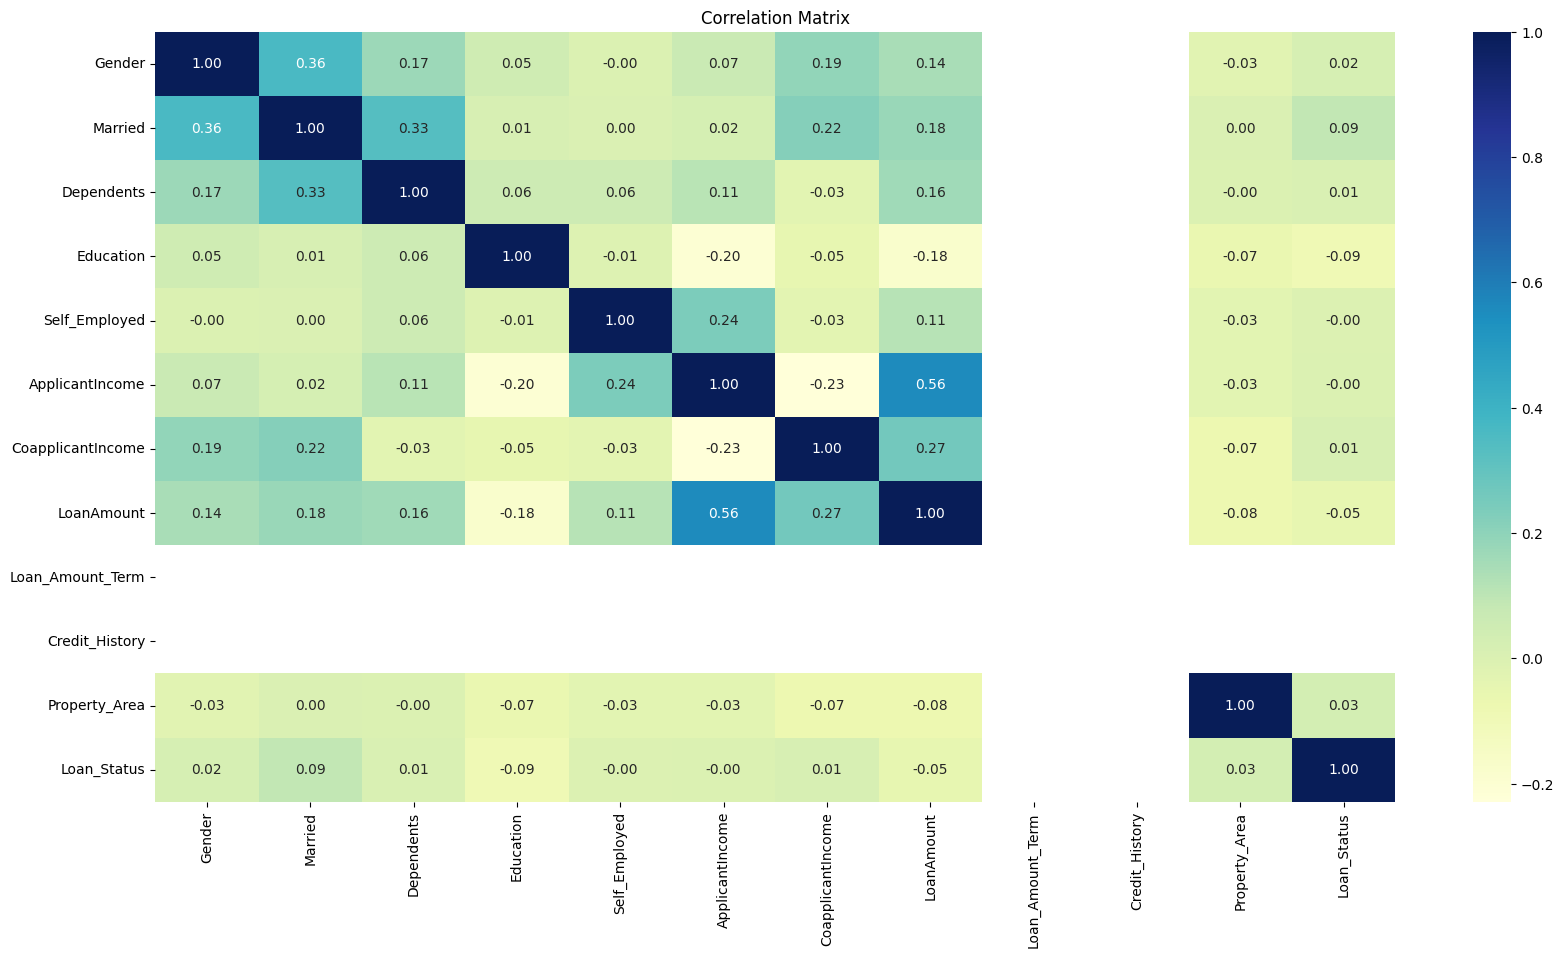

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Splitting Data into Features and Target Variable

X = train_data.drop(['Loan_Status','Loan_ID'], axis=1)
y = train_data['Loan_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ***Modelling - train_data***

### ***Logistic Regression***

In [48]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_logistic_pred = logistic_reg.predict(X_test)
y_logistic_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test,y_logistic_pred)

array([[ 1, 42],
       [ 0, 80]])

In [52]:
print('Accuracy :',accuracy_score(y_test,y_logistic_pred))
print('Precision :',precision_score(y_test,y_logistic_pred))
print('recall :',recall_score(y_test,y_logistic_pred))
print('F1 :',f1_score(y_test,y_logistic_pred))

Accuracy : 0.6585365853658537
Precision : 0.6557377049180327
recall : 1.0
F1 : 0.7920792079207921


### ***K-Nearest Neighbors (KNN)***

In [53]:
# hyperparameter tuning

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)
  classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_knn)
  metric_k.append(accuracy)


Text(0, 0.5, 'Accuracy')

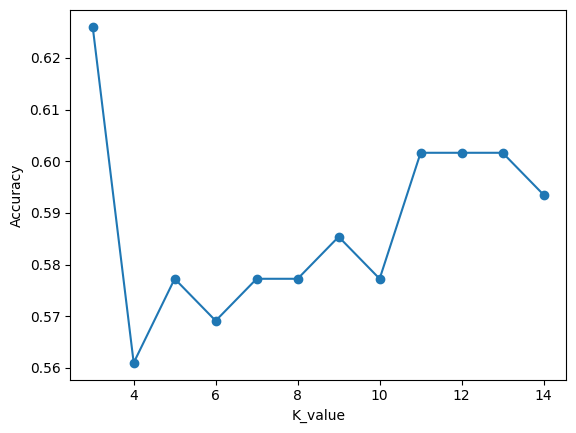

In [54]:
# plotting a line graph showing the relationship between the number of neighbors (k) and the corresponding accuracy

plt.plot(neighbors, metric_k, 'o-' )
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [89]:
# Create KNN classifier object
classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p=2)

# Train the KNN classifier on the training data.
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [90]:
# Make prediction
y_pred_knn = classifier.predict(X_test)

In [91]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('Precision :',precision_score(y_test,y_pred_knn))
print('recall :',recall_score(y_test,y_pred_knn))
print('F1 :',f1_score(y_test,y_pred_knn))

Accuracy : 0.5934959349593496
Precision : 0.6415094339622641
recall : 0.85
F1 : 0.7311827956989247


### ***Support Vector Machine (SVM)***

In [58]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
# Make prediction
y_pred_svm = svm_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_svm))

[[ 2 41]
 [ 2 78]]


In [60]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('Precision :',precision_score(y_test,y_pred_svm))
print('recall :',recall_score(y_test,y_pred_svm))
print('F1 :',f1_score(y_test,y_pred_svm))

Accuracy : 0.6504065040650406
Precision : 0.6554621848739496
recall : 0.975
F1 : 0.7839195979899497


### ***Decision Tree***

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state = 40)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [62]:
# Make prediction
y_pred_dt = dt_classifier.predict(X_test)

In [63]:
print(confusion_matrix(y_test,y_pred_dt))

[[12 31]
 [23 57]]


In [64]:
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('Precision :',precision_score(y_test,y_pred_dt))
print('recall :',recall_score(y_test,y_pred_dt))
print('F1 :',f1_score(y_test,y_pred_dt))

Accuracy : 0.5609756097560976
Precision : 0.6477272727272727
recall : 0.7125
F1 : 0.6785714285714285


### ***Random Forest***

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=10, criterion='entropy', min_samples_split=5)

# Train the model
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=150)

In [66]:
# Make prediction
y_pred_rf = rf_classifier.predict(X_test)

In [67]:
print(confusion_matrix(y_test,y_pred_rf))

[[ 2 41]
 [ 3 77]]


In [68]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('Precision :',precision_score(y_test,y_pred_rf))
print('recall :',recall_score(y_test,y_pred_rf))
print('F1 :',f1_score(y_test,y_pred_rf))

Accuracy : 0.6422764227642277
Precision : 0.652542372881356
recall : 0.9625
F1 : 0.7777777777777779


In [69]:
from sklearn.model_selection import cross_val_score

# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results[name] = scores.mean(), scores.std()

# Print average performance of each model
for name, (mean_score, std_score) in results.items():
    print(f'{name}: Mean Accuracy = {mean_score}, Std Accuracy = {std_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Mean Accuracy = 0.6924489795918368, Std Accuracy = 0.01448979591836736
Decision Tree: Mean Accuracy = 0.616938775510204, Std Accuracy = 0.06580200761816155
Random Forest: Mean Accuracy = 0.6680408163265307, Std Accuracy = 0.04641591664272349
SVM: Mean Accuracy = 0.696530612244898, Std Accuracy = 0.006193465675711644
KNN: Mean Accuracy = 0.6741224489795918, Std Accuracy = 0.04746473734393458


In [70]:
mean_accuracy_scores = {
    'Logistic Regression': 0.6863265306122449,
    'Decision Tree': 0.592530612244898,
    'Random Forest': 0.6618367346938776,
    'SVM': 0.6944897959183673,
    'KNN': 0.6434693877551021
}

# Find the model with the highest mean accuracy score
best_model = max(mean_accuracy_scores, key=mean_accuracy_scores.get)
best_accuracy = mean_accuracy_scores[best_model]

print("Best Model:", best_model)
print("Mean Accuracy:", best_accuracy)

Best Model: SVM
Mean Accuracy: 0.6944897959183673


In [108]:
best_model = SVC(kernel = 'linear')

### **THE BEST MODEL IS SUPPORT VECTOR MACHINE (SVM) WITH AN AVERAGE ACCURACY OF 0.69**

## ***Load the test_data***

In [71]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

In [72]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
test_data.shape

(367, 12)

## ***Pre-processing on test_data***

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [75]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### ***Pre-processing - Handling missing values***

In [76]:
# Checking for missing values
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

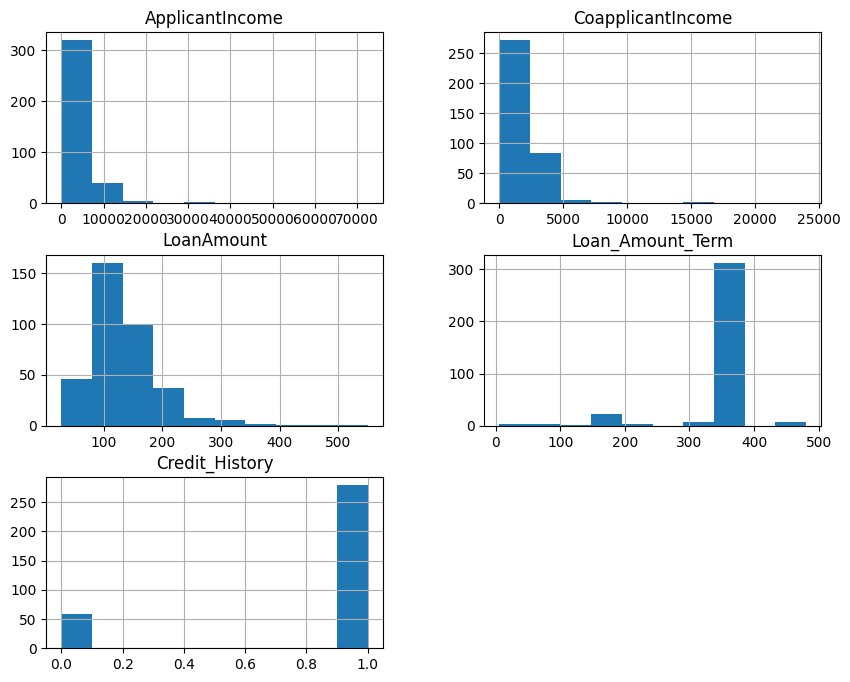

In [77]:
graph = test_data.select_dtypes(include=['float64','int64'])
graph.hist(figsize=(10,8))
plt.show()

In [78]:
# Handling missing values

# Filling missing values for 'LoanAmount' and 'Loan_Amount_Term' using median (slightly skewed)
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())

In [79]:
# considering 'Credit_History' is a binary variable (0 or 1),
# we can impute missing values with the mode (most frequent value),
# which is 1 in this case, assuming a majority of applicants have a credit history.

test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

In [80]:
# Fill missing values in categorical columns with mode

categorical_cols = ['Gender','Dependents', 'Self_Employed']
for i in categorical_cols:
   test_data[i].fillna(test_data[i].mode()[0], inplace=True)

In [81]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### ***Pre-processing - Handling Outliers***

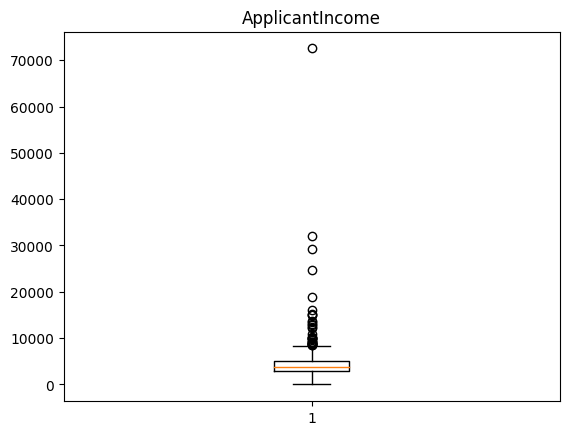

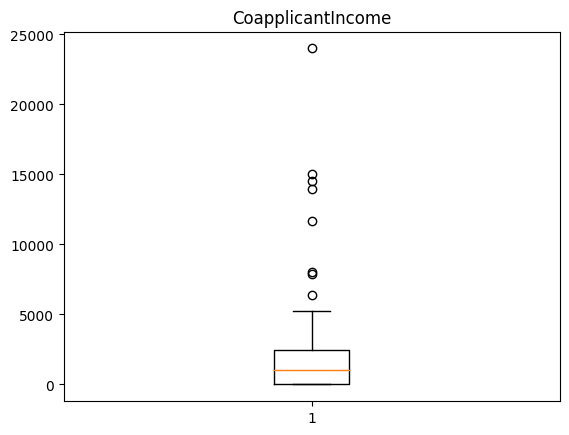

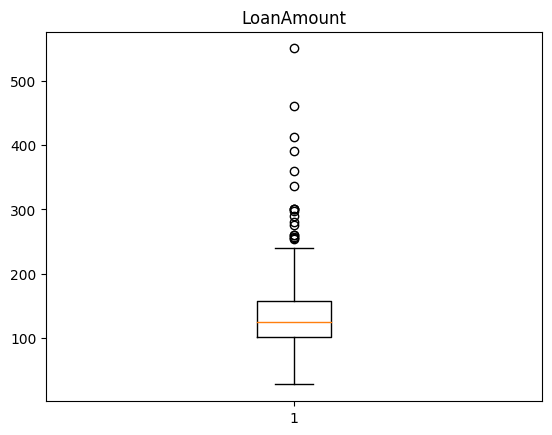

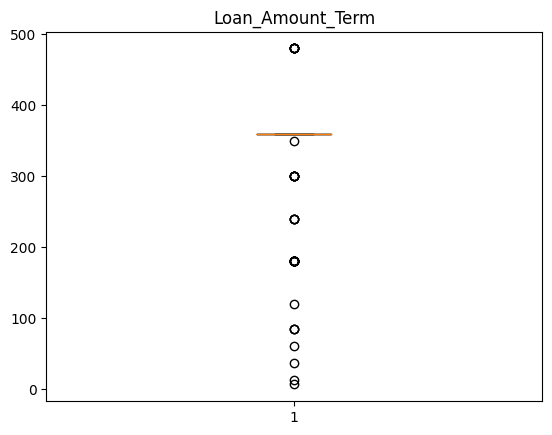

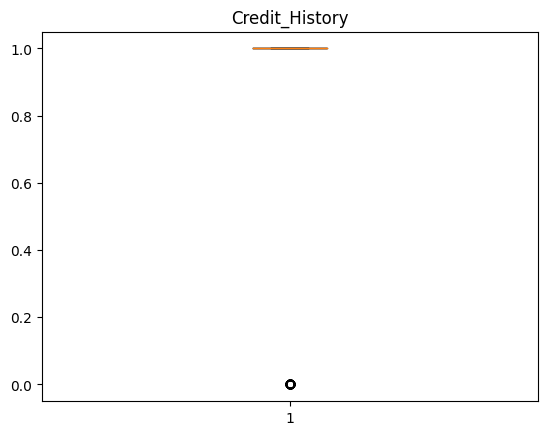

In [82]:
num_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_col:
  plt.boxplot(test_data[i])
  plt.title(i)
  plt.show()

In [83]:
# Handling outliers using IQR method

columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

def handle_outliers(train_data, columns):
  for x in columns:
    Q1 = test_data[x].quantile(0.25)
    Q3 = test_data[x].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    # clipping
    test_data[x] = test_data[x].clip(lower=lower_lim, upper=upper_lim)
    outliers = test_data[(test_data[x] < lower_lim) | (test_data[x] > upper_lim)]

  return test_data


test_data = handle_outliers(test_data,columns)

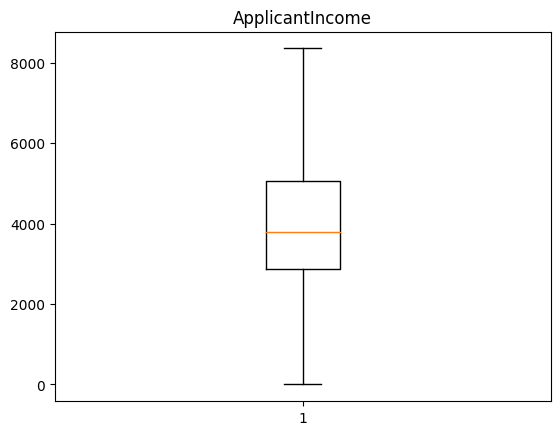

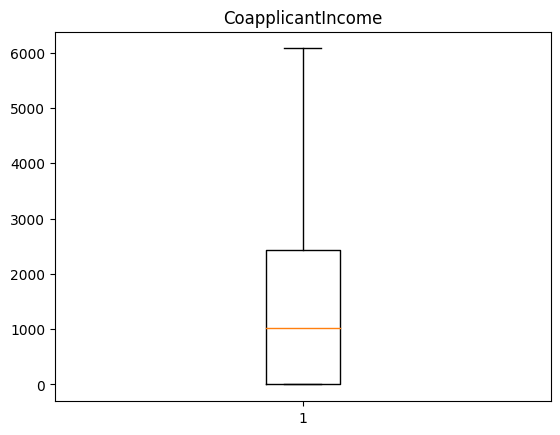

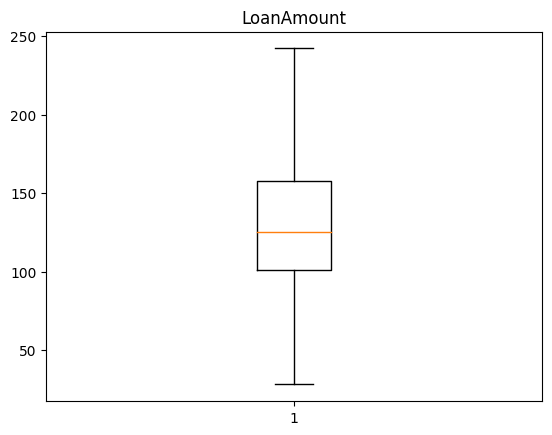

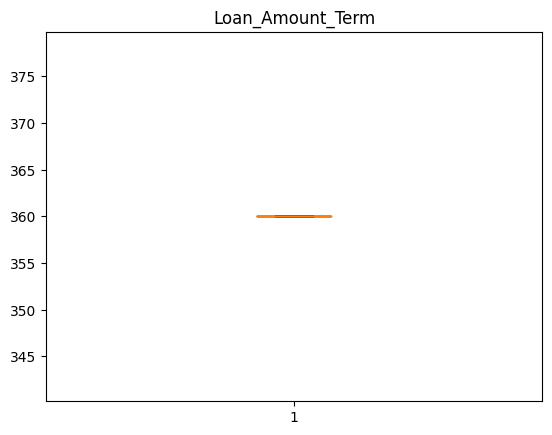

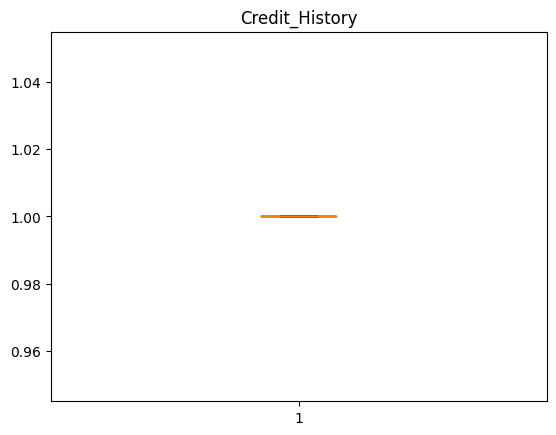

In [84]:
for i in num_col:
  plt.boxplot(test_data[i])
  plt.title(i)
  plt.show()

### ***Pre-processing - Encoding***

In [85]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [86]:
# Assuming cat_columns contains the names of all categorical columns in your dataset
cat_columns = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for col in cat_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [87]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2


In [97]:
# Make predictions on test data
test_ids = test_data['Loan_ID']
test_features = test_data.drop(columns='Loan_ID')
best_model.fit(X_train,y_train)

SVC(kernel='linear')

In [98]:
predictions = best_model.predict(test_data.drop('Loan_ID',axis=1))

In [99]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
approval = ['Y' if i == 1 else 'N' for i in predictions]

In [103]:
loan_data = pd.DataFrame({'Loan_ID':test_ids, 'Loan_Status':approval})

In [104]:
loan_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [105]:
loan_data['Loan_Status'].value_counts()

Y    351
N     16
Name: Loan_Status, dtype: int64

In [106]:
loan_data.to_csv('loan_data.csv', index = False)